## Introduction

Loan defaulting is a serious problem that affects both lenders and borrowers.Lenders lose money and trust when borrowers fail to repay their loans , while borrowers  suffer from damaged credit scores and legal consequences.Therefore, it is important to predict the likelihood of loan default  and take preventive measures to reduce the risk.
In this project we will use machine learning techniques to build a predictive model for loan default based on data from SuperLender, a local digital lending company.SuperLender uses data driven a data-driven  approach to assess the credit risk of its customers and determine  the two fundermental drivers of repayment; `willingness` and `ability`.We will explore hoiw SuperLender uses machine learning models to predict loan outcomes and evaluate their performance


## Business Understanding

Defaulting borrowers cause significant financial losses, impacting profit margins and liquidity ultimately affecting long-term business sustainability. Moreover, loan defaults can tarnish a company's reputation, erode investor confidence, and hinder future borrowing opportunities. 

Super Lender a local digital lending company seeks to provide effective credit risk model which determines borrower’s chances of repaying a loan. In this project we seek to develop a credit risk model employing machine learning techniques. The model assesses historical data to predict potential defaults, enabling proactive risk management. Also the model informs credit manager and the institution’s employees on borrower important details to enable data driven decisions not only to deny or advance a loan  but targeted strategies, including personalized loan terms.

## Problem Statement

A defaulted loan is an expense to the business. There is a need for financial institutions to enhance their risk assessment strategies and only lend responsibly.  As such predicting customer loan defaults is central to minimizing financial risks and ensuring sustainable lending practices. Chances of customer paying their loan are influenced by demographics and past financial details. The challenge is for financial institutions to distinguish customers who can pay loans and only lend to them.

## Main Objective

To develop a model which predicts customer loan repayment chances

## Specific Objective

* Determine which demographic factors affects customer loan repayment chances
*	Determine which past financial details and behavior affects customer loan repayment chances
*	To develop a UI which informs credit manager on customer’s loan repayment details. 

## Data Understanding

We will leverage datasets from Zindi, Africa's premier professional network for data scientists. Our focus centers on three distinct datasets for both training and testing purposes.

> a) Demographic data
- **customerid (Primary Key):** This serves as a unique identifier, ensuring the traceability of borrowers' histories across multiple datasets.
- **birthdate (Date of Birth of the Customer):** This feature provides valuable insights into borrowers' ages, a factor often correlated with financial stability and their ability to meet loan obligations.
- **bank_account_type (Type of Primary Bank Account):** This field reflects the customer's banking preferences and can indicate their financial stability.
- **latitude_gps / longitude_gps:** Geographic coordinates enable the assessment of regional risk factors that may influence borrowers' repayment tendencies.
- **bank_name_clients (Name of the Bank):** The choice of bank can offer insights into banking history and its potential impact on loan behavior.
- **bank_branch_clients (Location of the Branch):** If available, this provides additional context about borrowers' banking relationships.
- **employment_status_clients:** The employment status is a critical factor in determining income stability and the ability to repay loans.
- **level_of_education_clients:** Education level reflects financial literacy and potential income, affecting loan behavior.

> b) Perfomance data
- **customerid (Primary Key):** This identifier associates loan performance with individual borrowers, ensuring a comprehensive analysis.
- **systemloanid (Loan ID):** A unique identifier for each loan, allowing for tracking specific loan histories.
- **loannumber (Number of the Loan Being Predicted):** Understanding a borrower's history of loan applications is crucial for assessing their ability to manage multiple financial commitments.
- **approveddate (Date Loan Was Approved):** This feature facilitates historical trend analysis in loan approval, considering potential changes in economic conditions and lending policies over time.
- **loan amount:** A critical predictor of loan default, as larger loans may pose greater repayment challenges, increasing the risk of default.
- **totaldue (Total Repayment Required):** This helps assess the borrower's capacity to meet their financial obligations.
termdays (Loan Term): Loan duration can significantly impact default risk, as longer-term loans may have different default patterns compared to shorter-term loans.
- **referredby:** If available, this feature provides insights into customer referrals, which may influence loan behavior.
- **good_bad_flag (Loan Performance):** Accurate prediction of good_bad_flag is the central objective of the project.

> c) Previous loans data
- **customerid (Primary Key):** Similar to other datasets, this identifier ensures the association of historical loan data with individual borrowers for comprehensive analysis.
- **systemloanid (Loan ID):** A unique identifier for each loan, allowing tracking of specific loan histories.
loannumber (Number of the Loan Being Predicted): Understanding borrowers' historical borrowing patterns and their potential influence on current defaults.
- **approveddate (Date Loan Was Approved):** This feature provides timing information for previous loans, which is crucial for understanding loan behavior over time.
- **creationdate (Date Loan Was Created):** Similar to approveddate, it offers insights into the timing of loan applications.
- **loan amount:** Reflects the loan amount associated with previous loans.
- **totaldue (Total Repayment Required):** Helps assess the borrower's capacity to meet their financial obligations.
- **closeddate (Date Loan Was Settled):** Indicates when previous loans were paid off or settled, providing insights into past loan performance.
- **referredby:** If available, this feature offers insights into customer referrals, which may influence loan behavior.
- **firstduedate (Date of First Payment Due):** Provides information about the initial payment schedule.
- **firstrepaiddate (Actual Date of First Payment):** Records the date of the customer's first payment on previous loans, indicating their initial repayment behavior.

## Importing Libraries

In [1]:
#Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)

#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#Data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

#Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,\
GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#Model evaluation and selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#Model metrics and Visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.tree import plot_tree, export_text

In [2]:
# Loading the datasets
train_demographics = pd.read_csv("traindemographics.csv")
train_perf = pd.read_csv("trainperf.csv")
train_prev_loans = pd.read_csv("trainprevloans.csv")
test_demographics = pd.read_csv("testdemographics.csv")
test_perf = pd.read_csv("testperf.csv")
test_prev_loans = pd.read_csv("testprevloans.csv")

### Preview of Datasets

In [3]:
train_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [4]:
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [5]:
train_prev_loans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [6]:
#checking the shapes of the train data
print (train_demographics.shape)
print (train_perf. shape)
print (train_prev_loans.shape)

(4346, 9)
(4368, 10)
(18183, 12)


## Data Preprocessing
* The data is  demographics data is enhanced before merging by creating customer location from coordinates 

In [7]:
def add_cities(train_demographics):
    city_polygons_file = 'city_polygons.geojson'
    ndf = gpd.read_file(city_polygons_file)
    
    df = train_demographics.copy()
    final_df = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(train_demographics['longitude_gps'], train_demographics['latitude_gps'])
    )

    result_gdf = gpd.sjoin_nearest(final_df, ndf, how='left', distance_col='distances')

    cols_to_drop = ['geometry', 'index_right', 'state_id', 'distances']

    result_gdf.drop_duplicates(subset=['customerid'], inplace=True)

    return result_gdf.drop(columns=cols_to_drop)

# Call the function with train_demographics dataset
train_demographics_with_cities = add_cities(train_demographics)

train_demographics_with_cities['customer_residency'] = train_demographics_with_cities.apply(
    lambda row: row['state_name'] if row['country_name'].lower() == 'nigeria' else 'diaspora',
    axis=1
)
# Drop the coordinates
train_demographics_with_cities.drop(columns=['longitude_gps', 'latitude_gps'], inplace=True)

code processes geographic and demographic data by first reading city boundaries from a GeoJSON file and then associating these cities with customer records based on their geographic coordinates. It calculates distances between each customer's location and the nearest city and includes this information in the result. After cleaning the data by removing redundant columns, it adds a 'customer_residency' column, classifying customers as residing in specific states within Nigeria or as part of the diaspora, based on their country of residence. Finally, it removes the original geographic coordinates, leaving the data ready for further analysis or visualization.

In [8]:
train_demographics_with_cities.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'state_name', 'country_name',
       'customer_residency'],
      dtype='object')

#### The `trainperf` and `train_prev_loans` have same columns names. The columns names are renamed by adding `.perf` and `.prev`

In [9]:
columns_to_update = ['systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby']
train_perf.columns = [col + '.perf' if col in columns_to_update else col for col in train_perf.columns]

train_prev_loans.columns = [col + '.prev' if col in columns_to_update else col for col in train_prev_loans.columns]
print (train_perf. columns)
print(train_prev_loans.columns)

Index(['customerid', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')
Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')


### Merging the train data

In [10]:
# Merging the training data using customer id as the key value
train_data = pd.merge(train_prev_loans, train_demographics_with_cities, on='customerid', how='left')
merged_data = pd.merge(train_data, train_perf, on='customerid', how='left')
merged_data.shape

(18183, 30)

In [11]:
# Displaying the merged data dataset
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,firstduedate,firstrepaiddate,birthdate,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,state_name,country_name,customer_residency,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,referredby.perf,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,NaN,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,NaN,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,NaN,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1984-09-18 00:00:00.000000,Other,EcoBank,NaN,Permanent,NaN,Gombe,Nigeria,Gombe,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1977-10-10 00:00:00.000000,Savings,First Bank,NaN,Permanent,NaN,Oyo,Nigeria,Oyo,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good


In [12]:
# Getting statistics about the data
print("Stats about the data :", merged_data.describe())

Stats about the data :        systemloanid.prev  loannumber.prev  loanamount.prev  totaldue.prev  \
count       1.818300e+04     18183.000000     18183.000000   18183.000000   
mean        3.018395e+08         4.189353     16501.237420   19573.202931   
std         9.367767e+04         3.249490      9320.547516   10454.245277   
min         3.016001e+08         1.000000      3000.000000    3450.000000   
25%         3.017766e+08         2.000000     10000.000000   11500.000000   
50%         3.018550e+08         3.000000     10000.000000   13000.000000   
75%         3.019197e+08         6.000000     20000.000000   24500.000000   
max         3.020003e+08        26.000000     60000.000000   68100.000000   

       termdays.prev  systemloanid.perf  loannumber.perf  loanamount.perf  \
count   18183.000000       1.818300e+04     18183.000000     18183.000000   
mean       26.692790       3.019804e+08         8.378320     25663.531870   
std        10.946556       1.343207e+04         4.28

# Data Cleaning 
* This section checks for missing values, placeholders, duplicates and data consistency

In [13]:
# Create 'referredby' column by combining 'referredby.perf' and 'referredby.prev', replacing missing values with 0
merged_data['referredby'] = (merged_data['referredby.perf'].notnull()).astype(int) + (merged_data['referredby.prev'].notnull()).astype(int)

# Optionally, drop the intermediate columns if needed
merged_data = merged_data.drop(['referredby.perf', 'referredby.prev'], axis=1)

A new column 'referredby' is created in the 'merged data' DataFrame by combining information from 'referredby.perf' and 'referred.prev'. If either of these columns contains data, the 'referredby' column is set to 1, and if both have data, it's set to 2; otherwise, it's set to 0. Additionally, it allows the optional removal of the original columns, 'referredby.perf' and 'referredby.prev,'.

#### Checking for Missing Values

In [14]:
#Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values
percentage_missing_values = (missing_values / len(merged_data)) * 100

# Create a DataFrame to display missing values and percentages
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': percentage_missing_values
})

# Sort the DataFrame by 'Percentage' column in descending order
sorted_missing_data = missing_data_summary.sort_values(by='Percentage', ascending=False)

print("Missing values summary sorted by percentage in descending order:")
print(sorted_missing_data)

Missing values summary sorted by percentage in descending order:
                            Missing Values  Percentage
bank_branch_clients                  18079   99.428037
level_of_education_clients           14719   80.949238
employment_status_clients             5873   32.299401
state_name                            4510   24.803388
customer_residency                    4510   24.803388
birthdate                             4510   24.803388
bank_account_type                     4510   24.803388
bank_name_clients                     4510   24.803388
country_name                          4510   24.803388
good_bad_flag                            0    0.000000
termdays.perf                            0    0.000000
totaldue.perf                            0    0.000000
loanamount.perf                          0    0.000000
creationdate.perf                        0    0.000000
approveddate.perf                        0    0.000000
systemloanid.perf                        0    0.000000


* `bank_branch_clients` have 94% missing values hence they are dropped.   
*  Even though `level_of_education_clients`, `employment_status_clients ` , `longitude_gps` and                          
`latitude_gps`,  `bank_account_type` , `birthdate`, `bank_name_clients` have between 24% and 80% missing values, they are kept as they have important demographic information.

In [15]:
# Dropping columns with missing values as indicated above 
merged_data.drop(columns=['bank_branch_clients'], inplace=True)     

### Checking for outliers

Number of Outliers in loanamount.prev: 978
Number of Outliers in totaldue.prev: 676
Number of Outliers in termdays.prev: 1023
Number of Outliers in loanamount.perf: 0
Number of Outliers in totaldue.perf: 0
Number of Outliers in termdays.perf: 5240


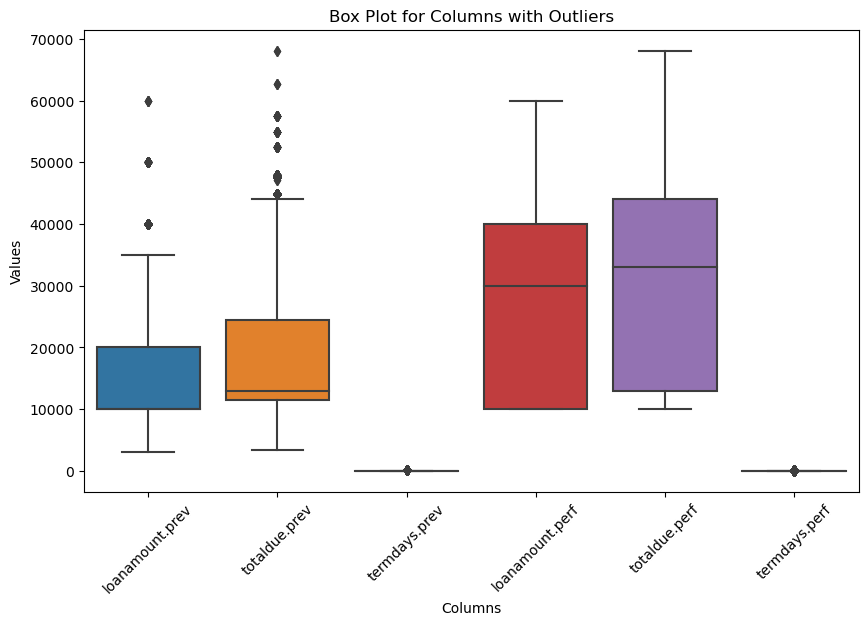

In [16]:
columns_to_check = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 'termdays.perf']

# Function to identify outliers using IQR method
def find_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    return outliers

# Check for outliers in specified columns and print the number of outliers
for column in columns_to_check:
    outliers = find_outliers(merged_data[column])
    num_outliers = len(outliers)
    print(f"Number of Outliers in {column}: {num_outliers}")

# Create box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[columns_to_check])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot for Columns with Outliers')
plt.show()

In [17]:
columns_to_check = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 'termdays.perf']

# Function to identify outliers using IQR method
def find_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    return outliers

# Check for outliers in specified columns and print the number of outliers
for column in columns_to_check:
    outliers = find_outliers(merged_data[column])
    num_outliers = len(outliers)
    print(f" Number of Outliers {column}  {num_outliers}")

 Number of Outliers loanamount.prev  978
 Number of Outliers totaldue.prev  676
 Number of Outliers termdays.prev  1023
 Number of Outliers loanamount.perf  0
 Number of Outliers totaldue.perf  0
 Number of Outliers termdays.perf  5240


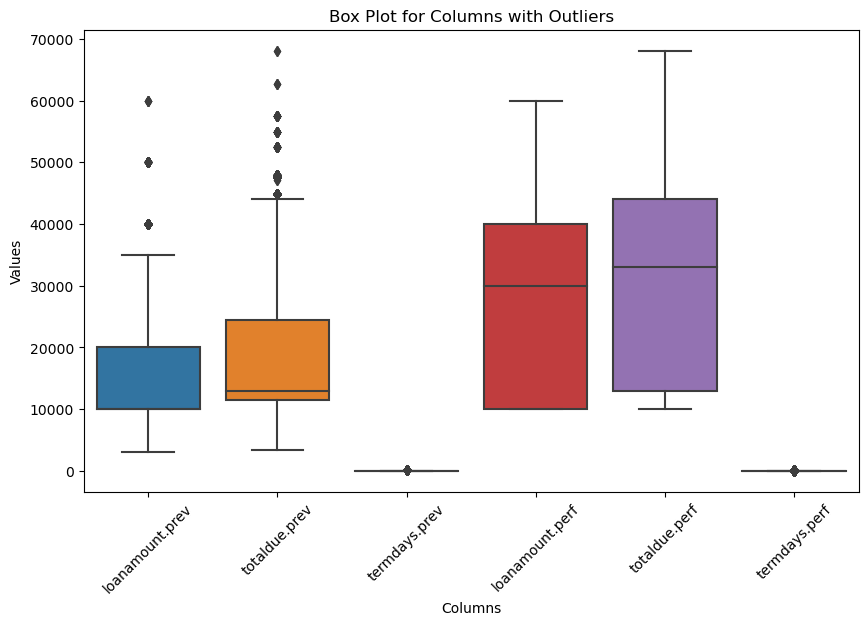

In [18]:
# List of columns to check for outliers
columns_to_check = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 'termdays.perf']

# Create box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[columns_to_check])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot for Columns with Outliers')
plt.show()

* The data  has outliers. However, domain knowledge shows that its expected where people borrow different amount of loans. The outliers are true events hence were included in the data 

### Check for  Row Duplicates

In [19]:
duplicates = merged_data.duplicated(keep=False).sum()
print("Number of duplicated rows in merged_data:", duplicates)

Number of duplicated rows in merged_data: 0


### Check for Data Consistency and Placeholders 

In [20]:
for column in merged_data.columns:
    unique_values = merged_data[column].unique()
    placeholders = [value for value in unique_values if str(value).lower() in ['placeholder', 'na', 'n/a', 'none']]
    placeholder_count = len(placeholders)    
    print(f"Placeholders for {column}, {placeholder_count}\n")

Placeholders for customerid, 0

Placeholders for systemloanid.prev, 0

Placeholders for loannumber.prev, 0

Placeholders for approveddate.prev, 0

Placeholders for creationdate.prev, 0

Placeholders for loanamount.prev, 0

Placeholders for totaldue.prev, 0

Placeholders for termdays.prev, 0

Placeholders for closeddate, 0

Placeholders for firstduedate, 0

Placeholders for firstrepaiddate, 0

Placeholders for birthdate, 0

Placeholders for bank_account_type, 0

Placeholders for bank_name_clients, 0

Placeholders for employment_status_clients, 0

Placeholders for level_of_education_clients, 0

Placeholders for state_name, 0

Placeholders for country_name, 0

Placeholders for customer_residency, 0

Placeholders for systemloanid.perf, 0

Placeholders for loannumber.perf, 0

Placeholders for approveddate.perf, 0

Placeholders for creationdate.perf, 0

Placeholders for loanamount.perf, 0

Placeholders for totaldue.perf, 0

Placeholders for termdays.perf, 0

Placeholders for good_bad_flag, 0

* The data does not have placeholders and there is consistency in the columns

##  Exploratory Data Analysis

#### Univariate Analysis

#### Loan Defaults

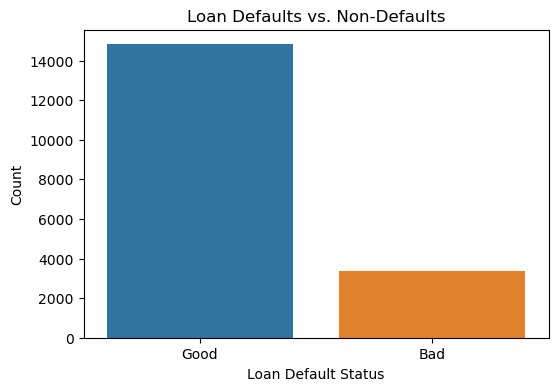

In [21]:
# Bar graph for 'good_bad_flag'
default_counts = merged_data['good_bad_flag'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=default_counts.index, y=default_counts.values)
plt.xlabel('Loan Default Status')
plt.ylabel('Count')
plt.title('Loan Defaults vs. Non-Defaults')
plt.show()


* Most customers paid loans while  less than 10% defaulted 

#### Setting up custom configuration settings for Matplotlib and Seaborn to control the appearance and style of plots

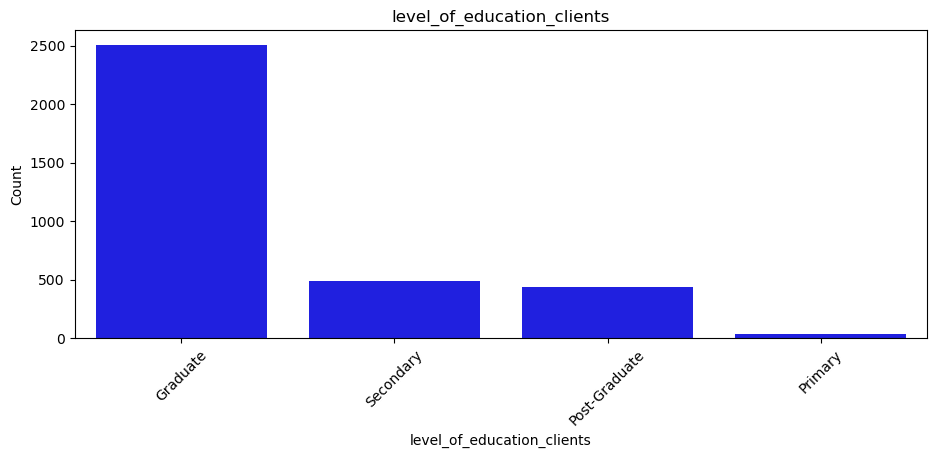

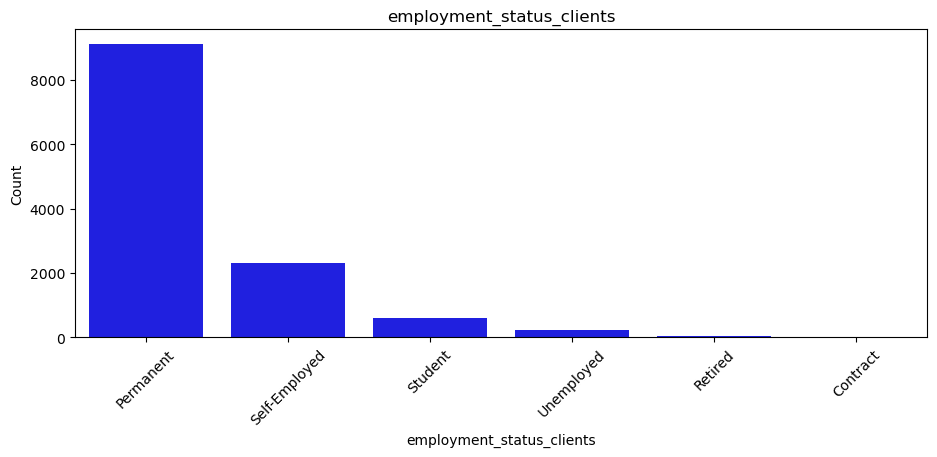

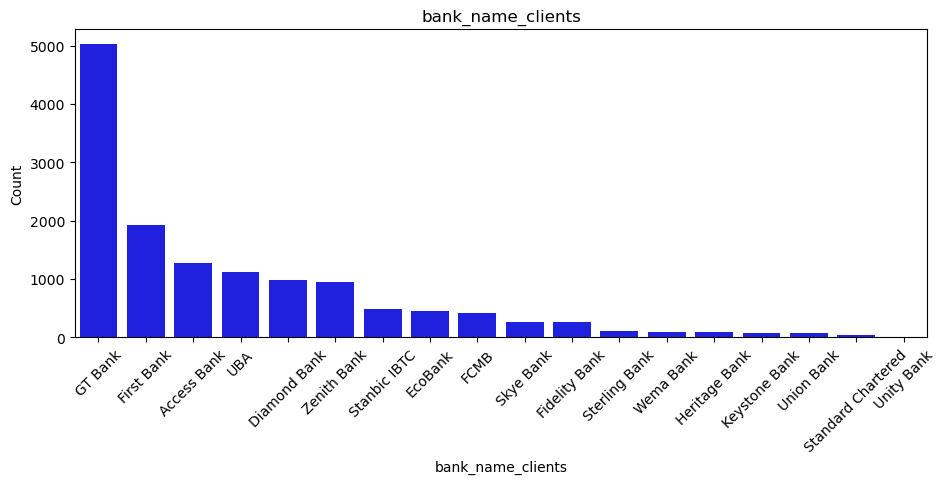

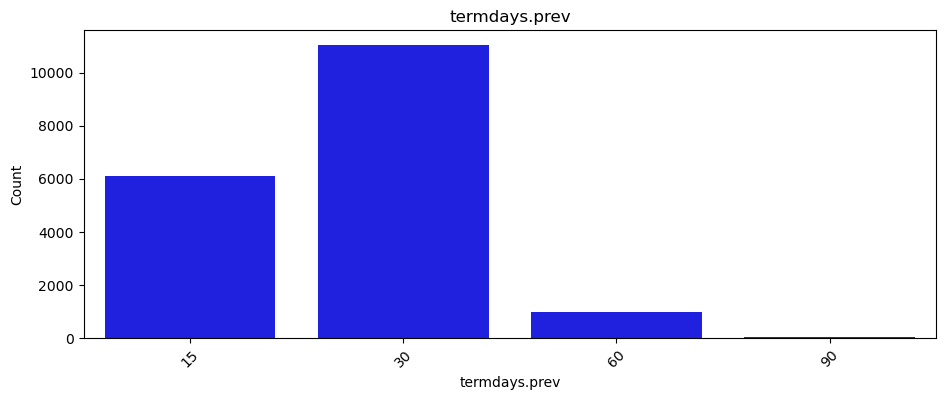

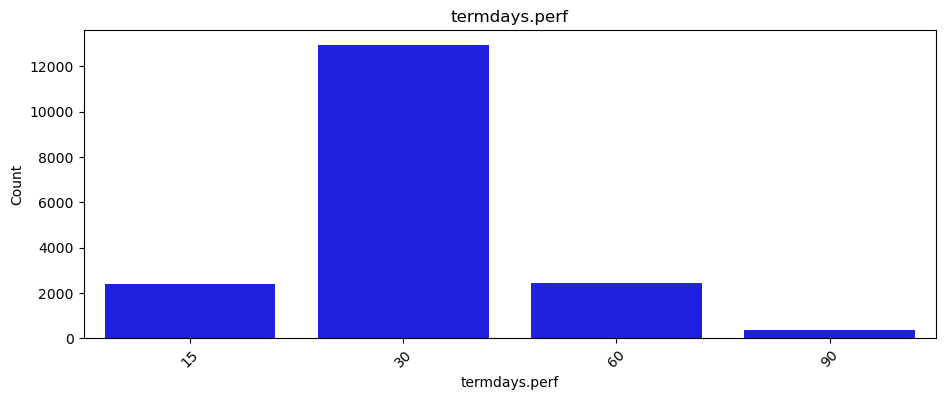

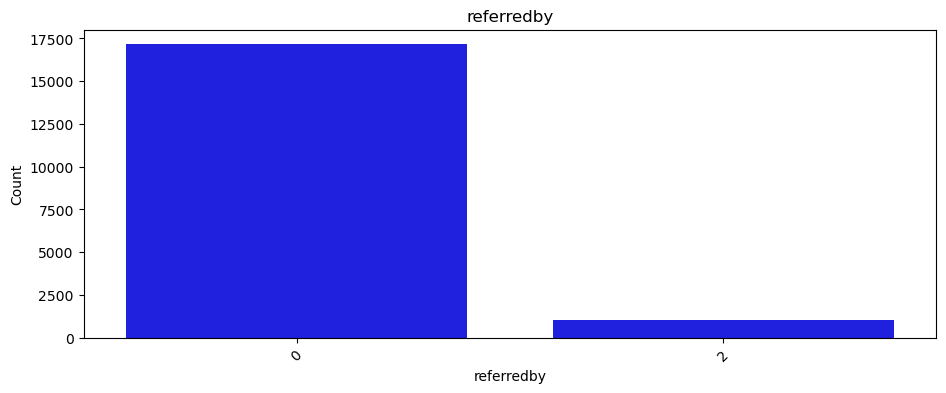

In [22]:
# Select  columns
columns = ['level_of_education_clients', 'employment_status_clients', 
                     'bank_name_clients', 'termdays.prev', 'termdays.perf','referredby']

for column in columns:
    # Calculate counts for the current variable
    counts_df = merged_data[column].value_counts().reset_index()
    counts_df.columns = [column, 'Count']
    
    # Sort the counts in descending order
    sorted_counts_df = counts_df.sort_values(by='Count', ascending=False)
    
    # Create a bar graph
    plt.figure(figsize=(11, 4))
    sns.barplot(x=column, y='Count', data=sorted_counts_df, color='blue')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column}')
    plt.xticks(rotation=45)
    plt.show()

* Most of the customers had graduate level of education, followed by post-graduate and secondary education as their highest level of education. Very few customers have Primary education.
* A majority of customers are employed permanently followed by those who are self-Employed and Students. Few customers were unemployed and retired 
* A majority of the customers banked with GT Bank followed by First Bank, Access Bank, and UBA. Other banks have a smaller number of clients.
* Most of the previous loans have a term duration of 30 days, followed by 15 days. There are also loans with durations of 60 days and 90 days, but these are much less common.


#### Distribution of customer residency

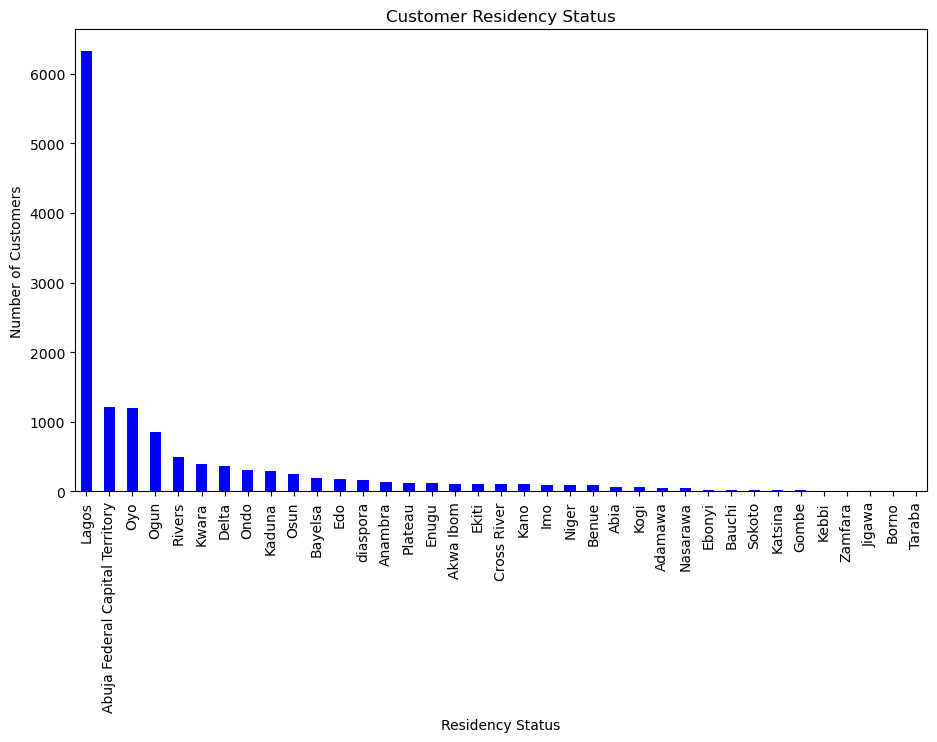

In [23]:
residency_counts = merged_data['customer_residency'].value_counts().sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(11, 6))
residency_counts.plot(kind='bar', color='blue')

# Set plot labels and title
plt.xlabel('Residency Status')
plt.ylabel('Number of Customers')
plt.title('Customer Residency Status')

# Display the plot
plt.show()

* Most customers reside in Lagos 
* After Lagos, Abuja Federal Capital Territory, Oyo, and Ogun have relatively high counts of between 1200 and 900 
* 13 states have less than 200 customers 
* There were 159 customers outside Nigeria


#### Distribution of numeric variables

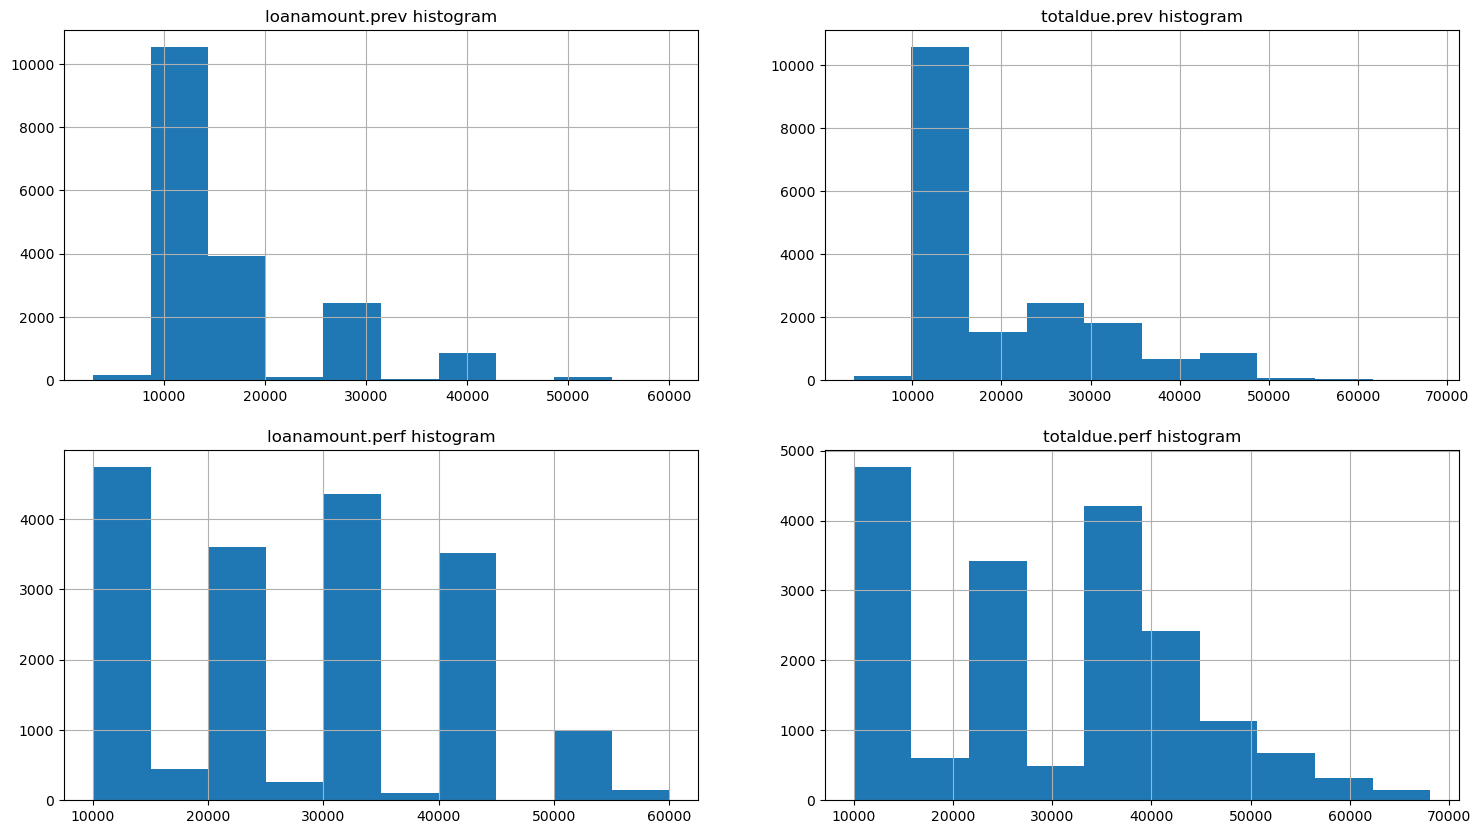

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 10))
hist_cols = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
for i, ax in enumerate(axs.flatten()):
    merged_data[hist_cols[i]].hist(ax=ax)
    ax.set_title(f'{hist_cols[i]} histogram')

### Bivariate EDA

Loan default status versus loan amount and totaldue

In [25]:
# Columns to calculate mean
columns_to_calculate_mean = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']

# Calculate mean for each variable based on 'good_bad_flag'
mean_values = merged_data.groupby('good_bad_flag')[columns_to_calculate_mean].mean()

# Display the mean values
print(mean_values)

               loanamount.prev  totaldue.prev  loanamount.perf  totaldue.perf
good_bad_flag                                                                
Bad               15138.954869   18084.679305     22790.973872   26981.250000
Good              16810.934863   19911.599663     26316.571043   30434.786068


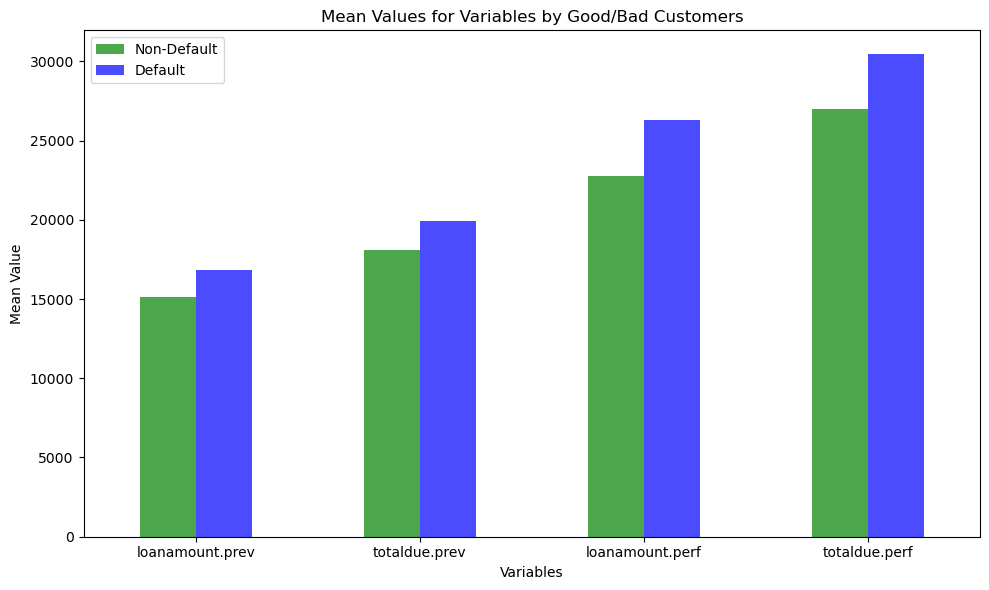

In [26]:
# Columns to plot
columns_to_calculate_mean = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']

# Calculate mean for each variable based on 'good_bad_flag'
mean_values = merged_data.groupby('good_bad_flag')[columns_to_calculate_mean].mean()

# Plotting
mean_values.T.plot(kind='bar', figsize=(10, 6), color=['green', 'blue'], alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Mean Values for Variables by Good/Bad Customers')
plt.xticks(rotation=0)
plt.legend(['Non-Default', 'Default'])
plt.tight_layout()
plt.show()

* Customers who have good loan performance tend to borrow more money than those who have bad loan performance. They have higher current and previous loan amounts as well as amounts due. Also This suggests that good customers have higher income or creditworthiness than bad customers

#### Loan default status versus customer demographics

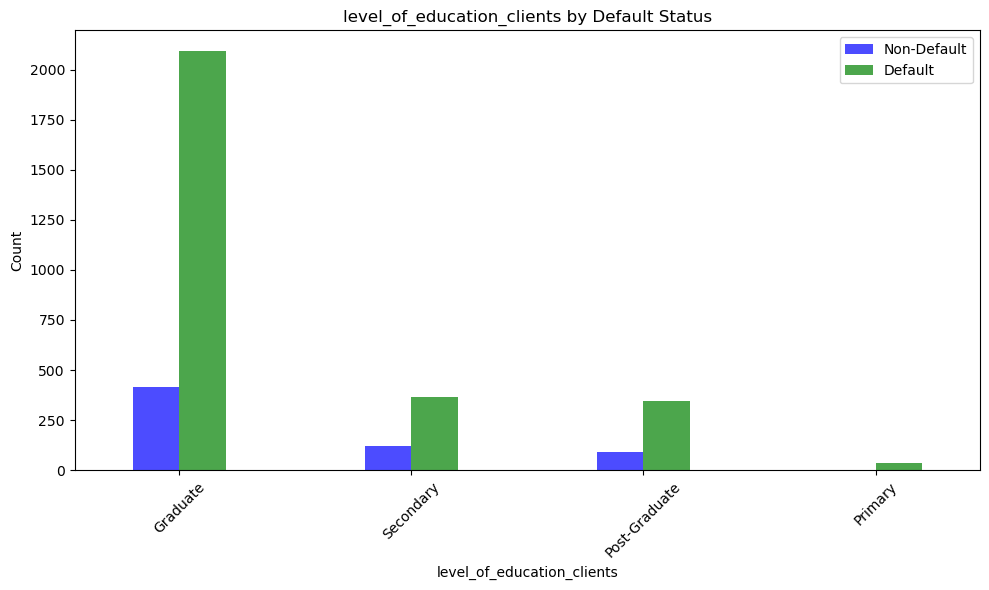

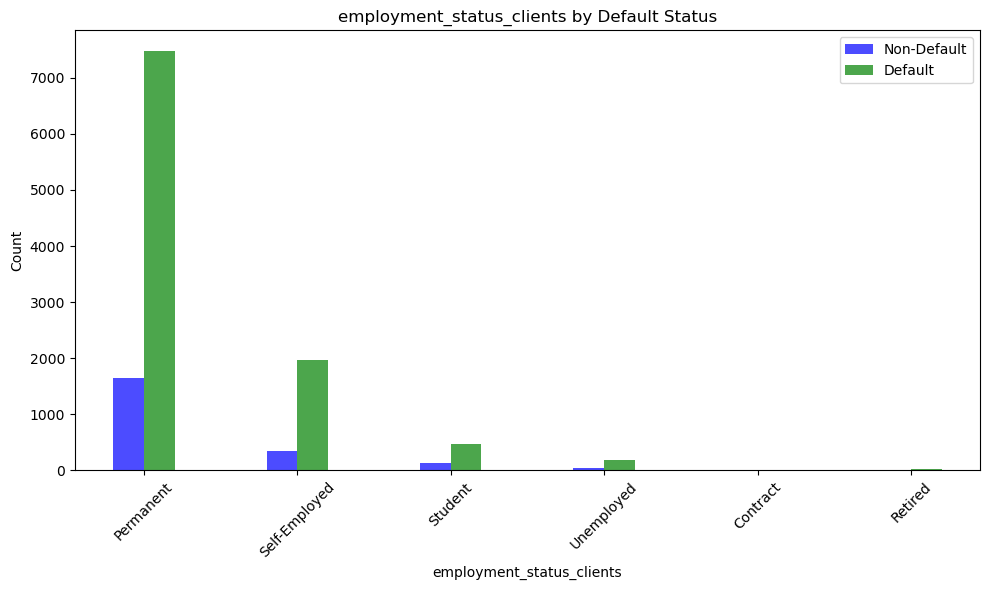

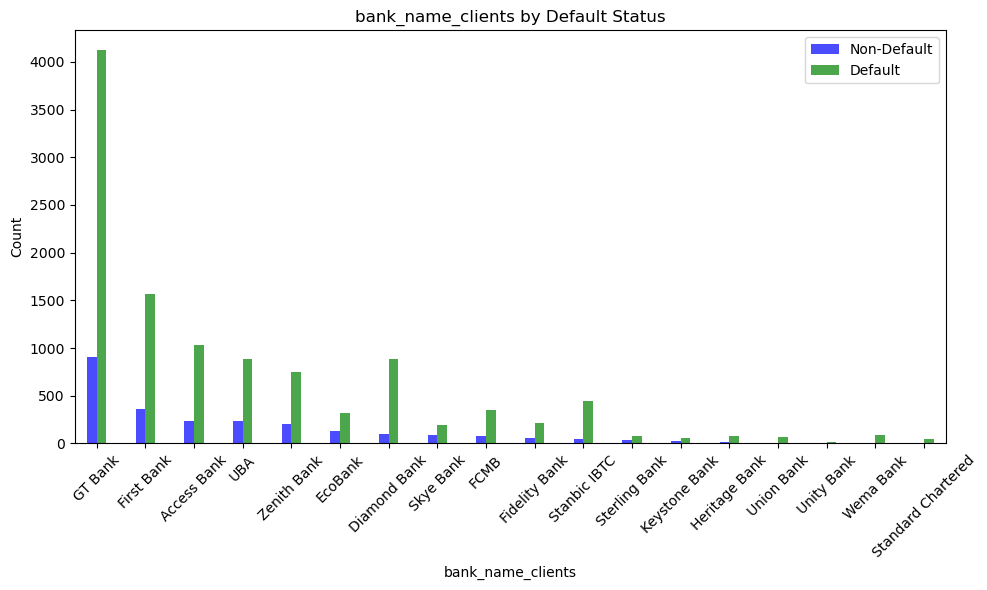

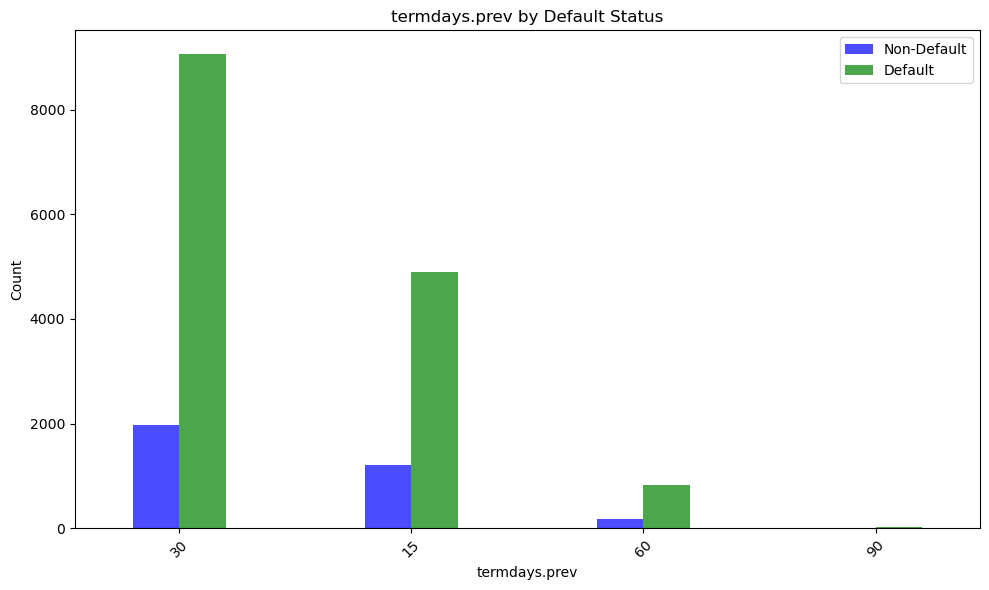

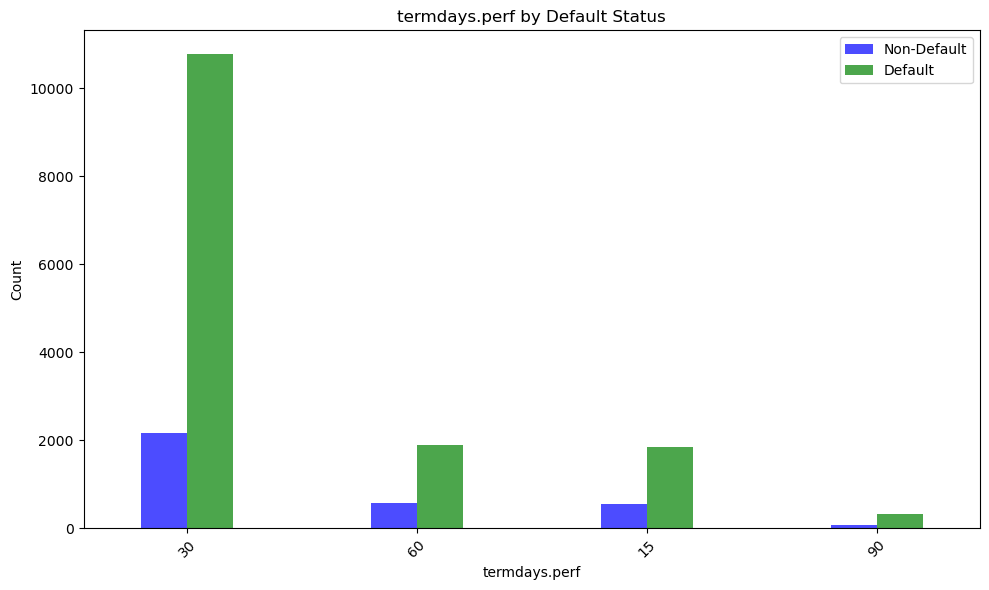

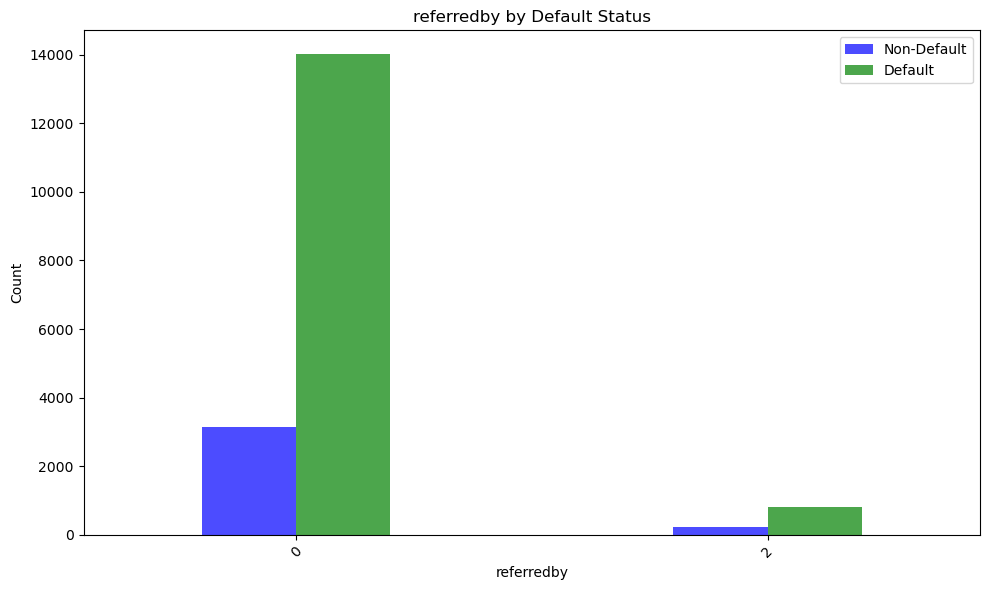

In [27]:
# Columns to analyze
columns_to_analyze = ['level_of_education_clients', 'employment_status_clients', 
                     'bank_name_clients', 'termdays.prev', 'termdays.perf', 'referredby']

# Iterate through columns and create individual grouped bar graphs for 'Good' and 'Bad' customers
for column in columns_to_analyze:
    # Calculate value counts for the current variable based on 'good_bad_flag'
    value_counts = merged_data.groupby([column, 'good_bad_flag']).size().unstack()
    
    # Sort the value counts in descending order
    value_counts = value_counts.sort_values(by='Bad', ascending=False)
    
    # Plot the grouped bar graph
    ax = value_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'], width=0.4, alpha=0.7)
    
    # Customize the plot
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'{column} by Default Status')
    plt.xticks(rotation=45)
    plt.legend(['Non-Default', 'Default'])
    plt.tight_layout()

* The proportion of good customers is higher than bad customers in every employment category, except for contract workers, who have no bad customers at all. This indicates that employment status is an important factor for loan performance.
* The proportion of good customers is higher than bad customers in every education level, except for primary, who have only one bad customer and 35 good customers. This suggests that level of education is also a relevant factor for loan performance
* The mean term days for both groups are similar, around 33 days. This means that the duration of the loan does not have a significant impact on the loan performance.
* GT Bank, First Bank, and Zenith Bank have a majority of good and bad customers, indicating they have a significant customer base overall.
* Good customers have a higher count in all term day categories, indicating that a larger proportion of good customers opt for longer-term loans.
* A majority of customers in both categories are not referred, indicating that referral status may not be a significant factor in distinguishing between good and bad customers.



Correlation matrix to understand the linear relationships between numerical variables and the target variable (good_bad_flag)

In [28]:
# Defined a function to identify numerical columns
def find_numeric_cols(df):
  # Select only the numeric columns
  numeric_cols = df.select_dtypes(include="number")
  # Get the column names as a list
  numeric_col_names = numeric_cols.columns.tolist()
  # Return the list of numeric column names
  return numeric_col_names

In [29]:
# Call the function to find numerical columns
numeric_col_names = find_numeric_cols(merged_data)

# Print the result
print("The numerical columns in the dataset are:")
print(numeric_col_names)

The numerical columns in the dataset are:
['systemloanid.prev', 'loannumber.prev', 'loanamount.prev', 'totaldue.prev', 'termdays.prev', 'systemloanid.perf', 'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf', 'referredby']


### Correlation heatmap of high correlated features

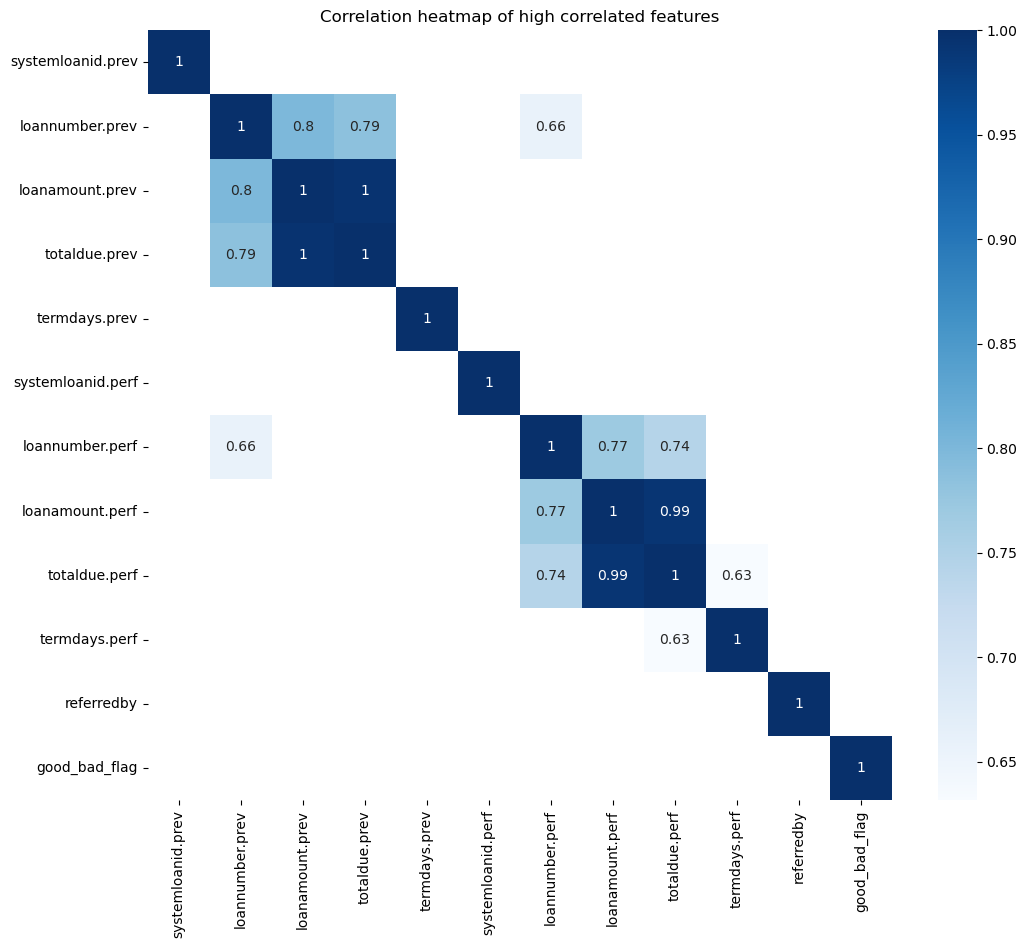

In [30]:
# Select the numerical columns and the target column
num_cols = ['systemloanid.prev', 'loannumber.prev', 'loanamount.prev', 'totaldue.prev', 'termdays.prev', 'systemloanid.perf',
            'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf', 'referredby']

target_col = "good_bad_flag"

# Convert the target column to a binary numeric column
merged_data[target_col] = merged_data[target_col].map({"Good": 1, "Bad": 0})

# Calculate the Pearson's correlation coefficients
corr_matrix = merged_data[num_cols + [target_col]].corr()

# Set the threshold value for high correlation
threshold = 0.6

# Filter the correlation matrix by the threshold value
high_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Plot the heatmap of the filtered matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation heatmap of high correlated features")
plt.show()

### Visualizing and measuring the relationship between previous and current loan amounts

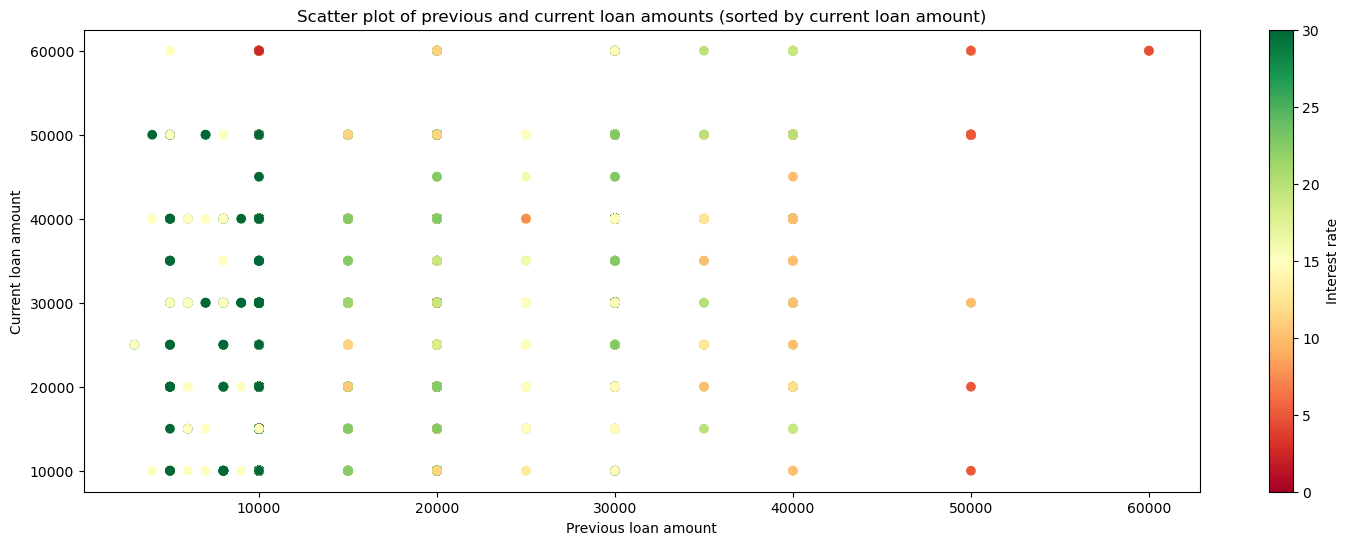

The correlation coefficient between previous and current loan amounts is 0.57


In [31]:
# Create interest_rate column using totaldue.prev and loanamount.prev
merged_data["interest_rate"] = (merged_data["totaldue.prev"] - merged_data["loanamount.prev"]) / merged_data["loanamount.prev"] * 100

# Scatter plot
plt.figure(figsize=(18,6))

# Sort the dataframe by current loan amount in descending order
sorted_data = merged_data.sort_values(by="loanamount.perf", ascending=False)

# Plot the scatter plot using the sorted dataframe
plt.scatter(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"], c=sorted_data["interest_rate"], cmap="RdYlGn")
plt.xlabel("Previous loan amount")
plt.ylabel("Current loan amount")
plt.title("Scatter plot of previous and current loan amounts (sorted by current loan amount)")
plt.colorbar(label="Interest rate")
plt.show()

# Correlation coefficient
corr = np.corrcoef(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"])[0,1]
print(f"The correlation coefficient between previous and current loan amounts is {corr:.2f}")

* The interest rate charged on a loan reflects the implied probability of default, assuming a zero recovery rate.This means that the higher the interest rate, the higher the risk of default that the lender expects.


* The red points indicate high interest rates and high risk of default, while the green points indicate low interest rates and low risk of default.
We can see that there is a negative correlation between the previous and current loan amounts and the interest rate, meaning that borrowers who have larger loans tend to have lower interest rates and lower risk of default.



### Creating a time series line plot of monthly loan payment trend

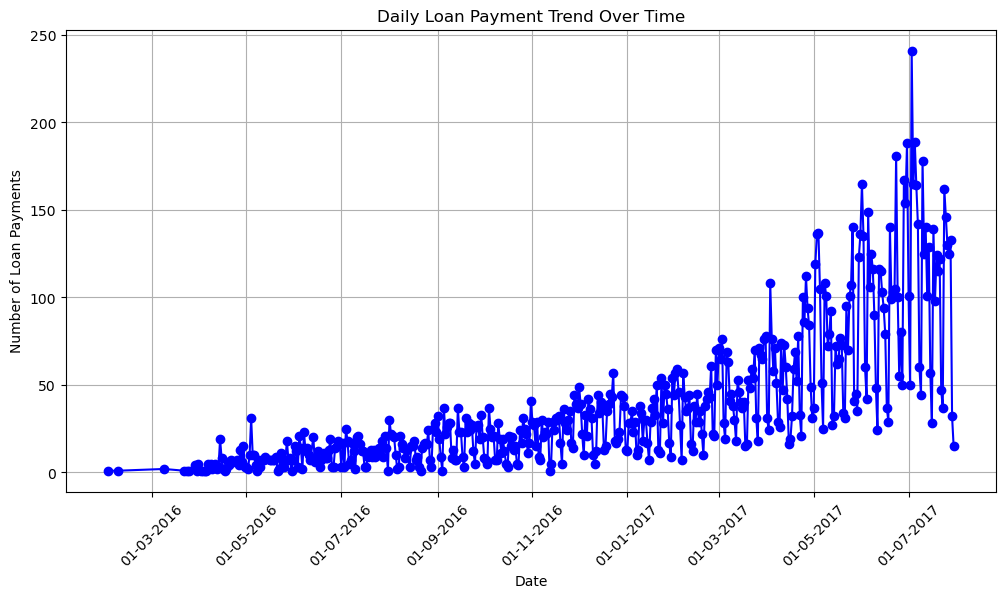

In [32]:
# Convert date columns to datetime objects
date_columns = ['firstduedate', 'firstrepaiddate']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col])

# Create a new column called 'date' that contains only the date part of 'firstrepaiddate'
merged_data['date'] = merged_data['firstrepaiddate'].dt.date

# Group data by date and count the number of loan payments
daily_payment_counts = merged_data.groupby('date')['firstrepaiddate'].count().reset_index()

# Create a time series line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_payment_counts['date'], daily_payment_counts['firstrepaiddate'], marker='o', linestyle='-', color='b')
plt.title('Daily Loan Payment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Loan Payments')
plt.grid(True)

# Format the x-axis labels as day, month, and year
myFmt = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=45)

plt.show()

- From the graph we conclude that their is an increase in trend in monthly loan repayment overtime most loans are bieng repayed over the course of the month

## Data preprocessing

In [33]:
merged_data.isna().sum()

customerid                        0
systemloanid.prev                 0
loannumber.prev                   0
approveddate.prev                 0
creationdate.prev                 0
loanamount.prev                   0
totaldue.prev                     0
termdays.prev                     0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
birthdate                      4510
bank_account_type              4510
bank_name_clients              4510
employment_status_clients      5873
level_of_education_clients    14719
state_name                     4510
country_name                   4510
customer_residency             4510
systemloanid.perf                 0
loannumber.perf                   0
approveddate.perf                 0
creationdate.perf                 0
loanamount.perf                   0
totaldue.perf                     0
termdays.perf                     0
good_bad_flag                     0
referredby                  

In [34]:
# Dropping rows with missing values

merged_data.dropna(axis=0,inplace=True)
merged_data.isna().sum()


customerid                    0
systemloanid.prev             0
loannumber.prev               0
approveddate.prev             0
creationdate.prev             0
loanamount.prev               0
totaldue.prev                 0
termdays.prev                 0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
birthdate                     0
bank_account_type             0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
state_name                    0
country_name                  0
customer_residency            0
systemloanid.perf             0
loannumber.perf               0
approveddate.perf             0
creationdate.perf             0
loanamount.perf               0
totaldue.perf                 0
termdays.perf                 0
good_bad_flag                 0
referredby                    0
interest_rate                 0
date                          0
dtype: int64

In [35]:
# Calculating the age of the customers
merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'])
merged_data['approveddate.perf'] = pd.to_datetime(merged_data['approveddate.perf'])

# Calculate age in years
merged_data['age'] = (merged_data['approveddate.perf'] - merged_data['birthdate']).dt.days // 365.25

# Display the DataFrame
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,firstduedate,firstrepaiddate,birthdate,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients,state_name,country_name,customer_residency,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,good_bad_flag,referredby,interest_rate,date,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14,2016-09-01 15:51:43,1972-01-15,Other,Diamond Bank,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1,0,30.0,2016-09-01,45.0
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30,2017-05-26 00:00:00,1972-01-15,Other,Diamond Bank,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1,0,30.0,2017-05-26,45.0
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04,2017-04-26 22:03:47,1972-01-15,Other,Diamond Bank,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1,0,19.0,2017-04-26,45.0
5,8a858970548359cc0154883481981866,301832407,5,2017-03-06 13:25:17.000000,2017-03-06 12:25:10.000000,20000.0,23800.0,30,2017-04-04 15:46:56.000000,2017-04-05,2017-04-04 15:31:47,1986-09-07,Other,GT Bank,Permanent,Primary,Abuja Federal Capital Territory,Nigeria,Abuja Federal Capital Territory,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,1,0,19.0,2017-04-04,30.0
6,8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,2017-07-04,2017-07-03 23:25:29,1986-09-07,Other,GT Bank,Permanent,Primary,Abuja Federal Capital Territory,Nigeria,Abuja Federal Capital Territory,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,1,0,30.0,2017-07-03,30.0


In [36]:
# Convert date columns to datetime objects
date_columns = ['approveddate.prev', 'creationdate.prev', 'approveddate.perf', 'creationdate.perf']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], format='%Y-%m-%d %H:%M:%S.%f')

# Calculate time differences and convert to minutes
merged_data['time_to_approval.prev'] = (merged_data['approveddate.prev'] - merged_data['creationdate.prev']).dt.total_seconds() / 60
merged_data['time_to_approval.perf'] = (merged_data['approveddate.perf'] - merged_data['creationdate.perf']).dt.total_seconds() / 60

In [37]:
# Create categorical features based on employment stability
merged_data['employment_stability'] = 'Unknown'

# Categorize into 'Stable,' 'Unstable,' and 'Unknown'
merged_data.loc[merged_data['employment_status_clients'].isin(['Permanent', 'Retired']), 'employment_stability'] = 'Stable'
merged_data.loc[merged_data['employment_status_clients'].isin(['Self-Employed', 'Contract']), 'employment_stability'] = 'Unstable'
merged_data['employment_stability'] = merged_data['employment_stability'].map({'Stable': 1, 'Unstable': 2, 'Unknown': 3})

# Drop the original 'employment_status_clients' column if no longer needed
merged_data.drop(columns=['employment_status_clients'], inplace=True)

### Dropping Columns

In [39]:
# Dropping columns
columns_to_drop = [
    'customerid', 'systemloanid.prev', 'loannumber.prev', 'systemloanid.perf', 'loannumber.perf',
    'approveddate.prev', 'creationdate.prev', 'closeddate', 'firstduedate', 'birthdate',
    'approveddate.perf', 'creationdate.perf', 'firstrepaiddate', 'state_name',
    'country_name'
]
merged_data.drop(columns=columns_to_drop, inplace=True)


In [40]:
merged_data.columns

Index(['loanamount.prev', 'totaldue.prev', 'termdays.prev',
       'bank_account_type', 'bank_name_clients', 'level_of_education_clients',
       'customer_residency', 'loanamount.perf', 'totaldue.perf',
       'termdays.perf', 'good_bad_flag', 'referredby', 'interest_rate', 'date',
       'age', 'time_to_approval.prev', 'time_to_approval.perf',
       'employment_stability'],
      dtype='object')

### Handling Class Imbalance

In [42]:
# Assuming 'merged_data' is your DataFrame
y = merged_data['good_bad_flag'].map({"Good": 1, "Bad": 0})

# Features columns
X = merged_data.drop(['good_bad_flag'], axis=1)

# Splitting our predictors into categorical columns and numerical columns
X_cat = X.select_dtypes(exclude='number')
X_num = X.select_dtypes(include='number')

# Instantiate OneHotEncoder Class
ohe = OneHotEncoder(sparse=False)

# Create a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('cat', ohe, X_cat.columns)],
    remainder='passthrough'
)

# Fit and transform the data
X_final = preprocessor.fit_transform(X)

# Get feature names for the encoded categorical features
encoded_cat_columns = preprocessor.named_transformers_['cat'] \
                                   .get_feature_names_out(input_features=X_cat.columns)

# Combine with numerical feature names
all_feature_names = list(encoded_cat_columns) + list(X_num.columns)

# Create the final dataset by concatenating features and target
data_final = pd.DataFrame(X_final, columns=all_feature_names)
data_final['good_bad_flag'] = y.values

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_final.drop('good_bad_flag', axis=1), data_final['good_bad_flag'])

# Create a new DataFrame with the resampled data
data_resampled = pd.DataFrame(X_resampled, columns=data_final.drop('good_bad_flag', axis=1).columns)
data_resampled['good_bad_flag'] = y_resampled


ValueError: Input y contains NaN.

## Modelling 
##### LOGISTIC REG

Confusion Matrix:
[[460  88]
 [138 446]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       548
           1       0.84      0.76      0.80       584

    accuracy                           0.80      1132
   macro avg       0.80      0.80      0.80      1132
weighted avg       0.80      0.80      0.80      1132



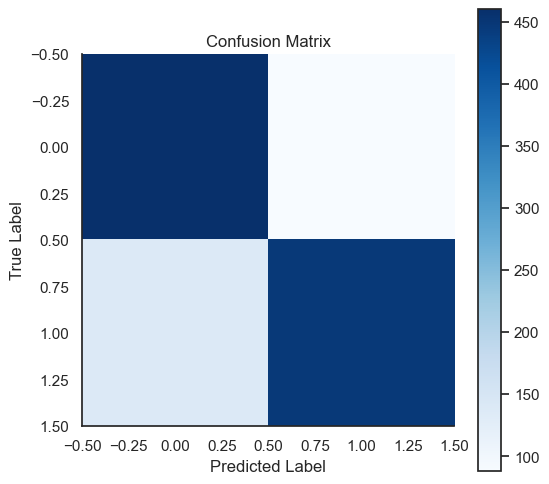

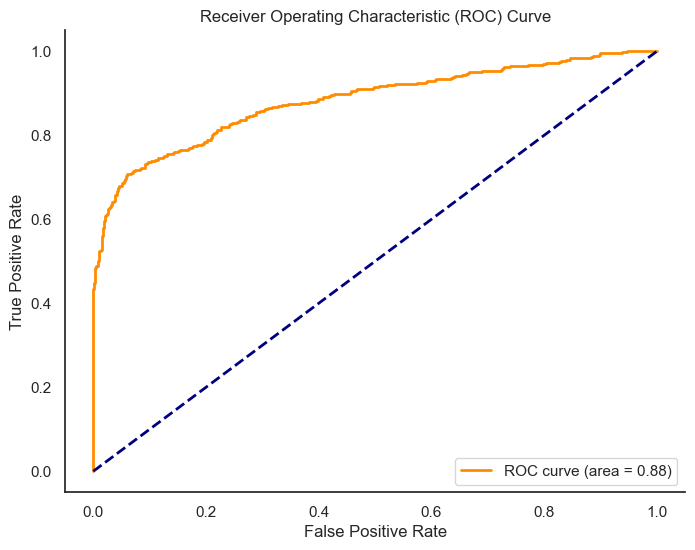

In [ ]:
# Splitting the data into features and target variable
X = data_resampled.drop('good_bad_flag', axis=1)
y = data_resampled['good_bad_flag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a Logistic Regression pipeline
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Train the model using the resampled data
logreg_pipe.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = logreg_pipe.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
y_prob = logreg_pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* The confusion matrix shows that it correctly identified 446 defaulted loans and 460 non-defaulted loans. While it made 88 false positive predictions and missed 138 actual defaults.
* Classification report: For non-defaulted loans (Class 0), the model has a precision of 0.77, meaning 77% of the loans predicted as non-defaulted were accurate, and a recall of 0.84, indicating that 84% of the actual non-defaulted loans were correctly identified. The F1-score of 0.80 suggests a harmonious blend of precision and recall. For defaulted loans (Class 1), the precision is 0.84, revealing that 84% of predicted defaults were accurate, and recall stands at 0.76, implying that 76% of actual defaults were correctly identified. Again, the F1-score of 0.80 signifies balance. 
* With an overall accuracy of 80%, the model demonstrates its effectiveness in identifying loan defaults.

#### Logistic Regression Feature importance

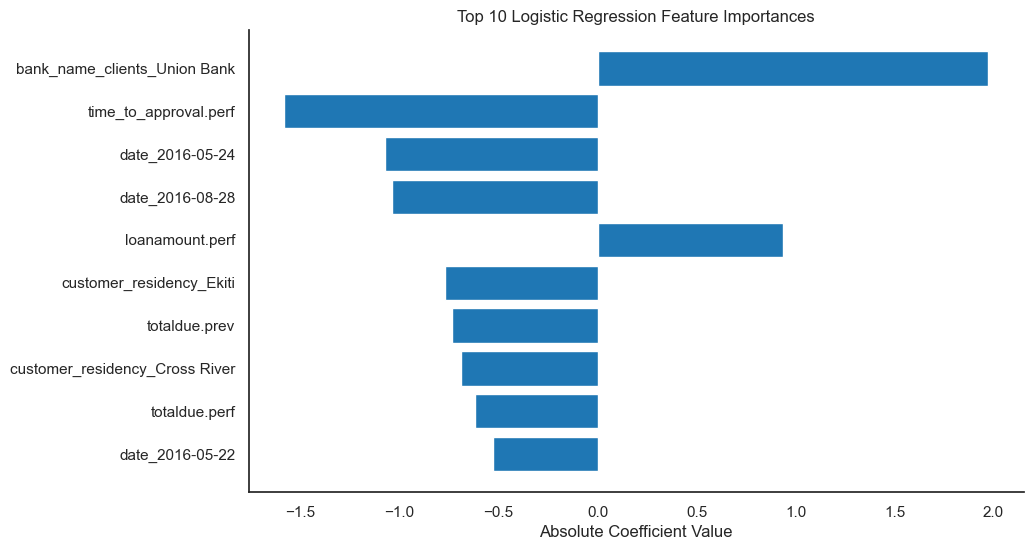

In [ ]:
# Extract feature importances
logreg_coef = logreg_pipe.named_steps['logreg'].coef_[0]
feature_names = X_resampled.columns

# Sort features by their absolute coefficients
sorted_indices = np.argsort(np.abs(logreg_coef))
sorted_feature_names = feature_names[sorted_indices]
sorted_logreg_coef = logreg_coef[sorted_indices]

# Select the top 10 features
top_features = sorted_feature_names[-10:]
top_coef = sorted_logreg_coef[-10:]

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_coef, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Logistic Regression Feature Importances')
plt.show()

* The highest importance is attributed to "bank_name_clients_Union Bank," with a relatively high positive coefficient value of approximately 1.8. This suggests that customers associated with Union Bank are more likely to experience loan defaults.
* The lowest importance is assigned to "date_2016-08-28," with a negative coefficient value of approximately -1.2. This indicates that loans associated with this specific date have a reduced likelihood of default.

### Decision Tree

In [ ]:
# Instantiate a Decision Tree model with random state = 42
dt_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Fit the training data to the pipeline
dt_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_pipe.predict(X_test)

# Print the classification report for Decision Tree
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       548
           1       0.99      0.98      0.98       584

    accuracy                           0.98      1132
   macro avg       0.98      0.98      0.98      1132
weighted avg       0.98      0.98      0.98      1132



### Interpretation for the decision tree
#### Classification report:
* Precision: For class 0 (non-default), the precision is 0.98, indicating that 98% of the cases predicted as non-default are correct, minimizing false positives. For class 1 (default), the precision is also 0.98, suggesting that 98% of the cases predicted as default are correct. The high precision values indicate a low rate of false predictions for both classes.

* Recall: For class 0, the recall is 0.99, signifying that the model correctly identifies 99% of the actual non-default cases. Similarly, for class 1, the recall is 0.98, indicating that 98% of the actual default cases are correctly identified. These high recall values demonstrate the model's ability to effectively capture true positives.
F1-Score: The F1-scores, which are the harmonic mean of precision and recall, are both 0.98 for class 0 and class 1. These F1-scores reflect the model's balanced performance in identifying both non-default and default cases, considering precision and recall.

* Accuracy: The overall accuracy of the model is 0.98, indicating that 98% of all cases in the test set are correctly classified. 

* Macro and Weighted Averages: Both the macro and weighted averages for precision, recall, and F1-score are 0.98, signifying that the model's excellent performance extends across both classes and is not biased towards one class.

### Feature Importance for Decision Tree

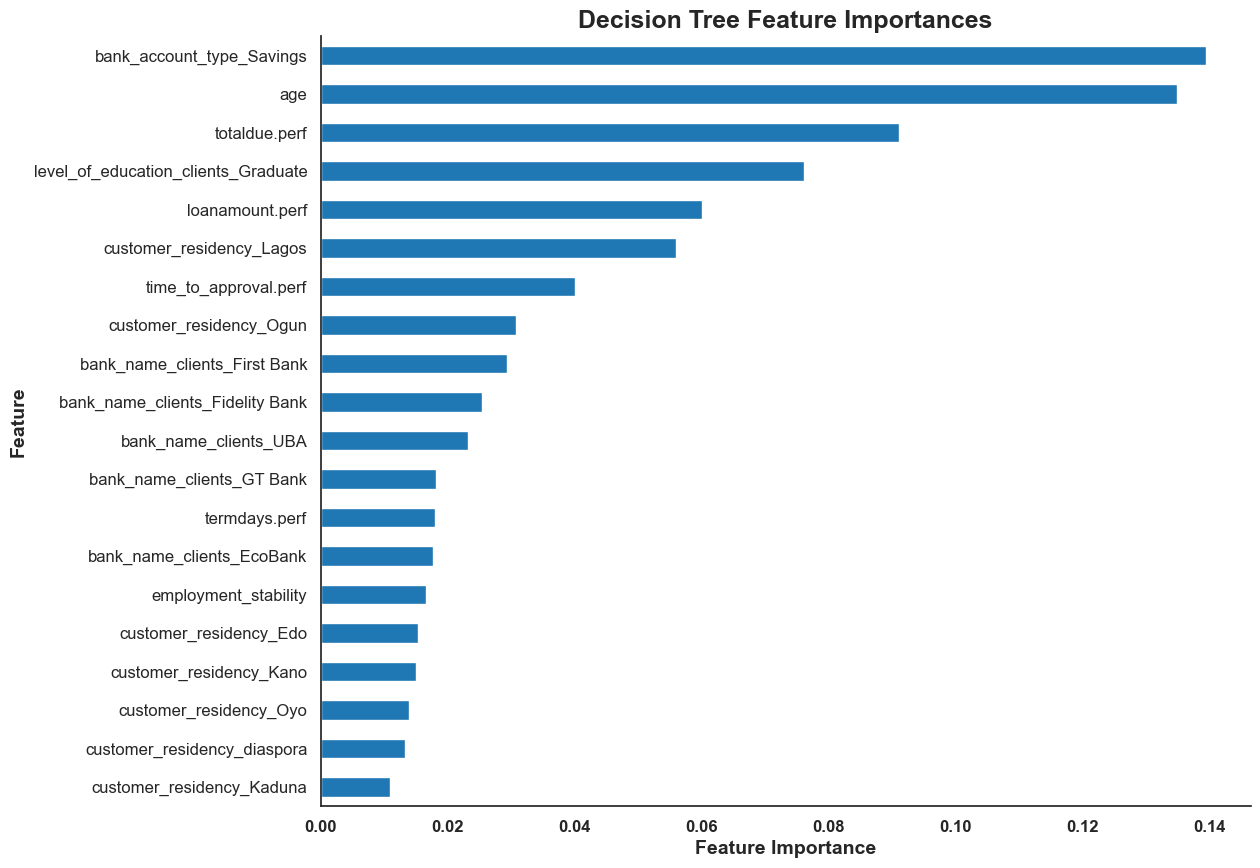

<Axes: title={'center': 'Decision Tree Feature Importances'}, xlabel='Feature Importance', ylabel='Feature'>

In [ ]:
def plot_feat_importance(clf, feature_names, model_title=''):
    """
    Takes in an sklearn classifier already fit to training data, the feature names, and optionally a title describing the model. 
    Returns a horizontal barplot showing the top 20 most important features in descending order.
    """
    feature_importances = clf.feature_importances_
    importance = pd.Series(feature_importances, index=feature_names)
    sorted_idx = importance.sort_values().tail(20).index
    
    plt.figure(figsize=(12, 10))
    fig = importance[sorted_idx].plot(kind='barh')
    fig.set_title('{} Feature Importances'.format(model_title), fontsize=18, fontweight='bold')
    plt.xlabel('Feature Importance', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.show()
    
    return fig
plot_feat_importance(dt_pipe.named_steps['dt'], feature_names=X_train.columns, model_title='Decision Tree')

* "bank_account_type_savings" and "age" are the most influential features, with the highest importance scores, suggesting they play a crucial role in predicting loan defaults. The type of bank account, specifically "savings," appears to be a significant determinant of default risk, as does the borrower's age. 
* "customer_residency_Kaduna" and "customer_residency_diaspora" have the least importance, indicating that the specific residency location in Kaduna and the "diaspora" residency category have minimal impact on the model's decision-making. These findings offer valuable insights for risk assessment and decision-making in the lending operation, helping prioritize features that drive accurate predictions and ensuring a better understanding of the model's behavior.

### Tree Pruning

In [ ]:
# hyperparameters for grid search
param_grid = {
    'dt__max_depth': [3, 5, 7],  
    'dt__min_samples_split': [2, 5, 10], 
    'dt__min_samples_leaf': [1, 2, 4]  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_dt = grid_search.best_estimator_

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)

# Print the classification report for Decision Tree
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_report)

# Print the best parameters found during grid search
print("Best Parameters:", grid_search.best_params_)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       548
           1       0.90      0.90      0.90       584

    accuracy                           0.90      1132
   macro avg       0.90      0.90      0.90      1132
weighted avg       0.90      0.90      0.90      1132

Best Parameters: {'dt__max_depth': 7, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}


#### Interpretation 
* After hyperparameter tuning, the Decision Tree model's performance remained high but was slightly improved. It achieved precision, recall, and F1-score values of approximately 0.90 for both Class 0 and Class 1.
* The accuracy was slightly reduced to 0.90, signifying that the model correctly predicted loan defaults and non-defaults in 90% of the cases.
* The key difference is that after hyperparameter tuning, the model's performance became more balanced, with slightly reduced but still excellent precision, recall, and F1-score values.
* Hyperparameter tuning resulted in a Decision Tree model that maintained high performance while achieving a more balanced and potentially more reliable prediction of loan defaults and non-defaults.

### Cross Validation of the  Decision Tree

In [ ]:
# Perform 5-fold cross-validation on the entire dataset
cross_val_scores = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

# Fit the training data to the pipeline
dt_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_pipe.predict(X_test)

# Print the classification report for Decision Tree
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_report)

Cross-Validation Scores: [0.9812362  0.97461369 0.96909492 0.98342541 0.9878453 ]
Mean Accuracy: 0.979243106118815
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       548
           1       0.99      0.98      0.98       584

    accuracy                           0.98      1132
   macro avg       0.98      0.98      0.98      1132
weighted avg       0.98      0.98      0.98      1132



#### Decision tree cross validation interpretation
- **Cross validation score:** The scores of the accuracy for the 5 folds are quite high, indicating that the Decision Tree model consistently performs well in distinguishing between loan defaults and non-defaults in various subsets of the data.

- **Mean Accuracy:** An accuracy of 0.979 representing the overall accuracy of the model when tested on different subsets of the data which indicates that the model correctly predicts loan defaults and non-defaults for nearly 97.9% of the cases, demonstrating a high level of reliability.

### Classification report:
* For Class 0 (non-defaulted loans), the model demonstrates precision, recall, and F1-score values around 0.98, indicating a strong ability to correctly classify non-defaulted cases.
* For Class 1 (defaulted loans), the model also exhibits precision, recall, and F1-score values around 0.98, suggesting its effectiveness in correctly identifying defaulted loans.
* The overall accuracy, as shown in the report, is 0.98, highlighting the model's capability to make accurate predictions across both classes.

### Random Forest 



Random Forest Accuracy: 0.9982332155477032
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       548
           1       1.00      1.00      1.00       584

    accuracy                           1.00      1132
   macro avg       1.00      1.00      1.00      1132
weighted avg       1.00      1.00      1.00      1132



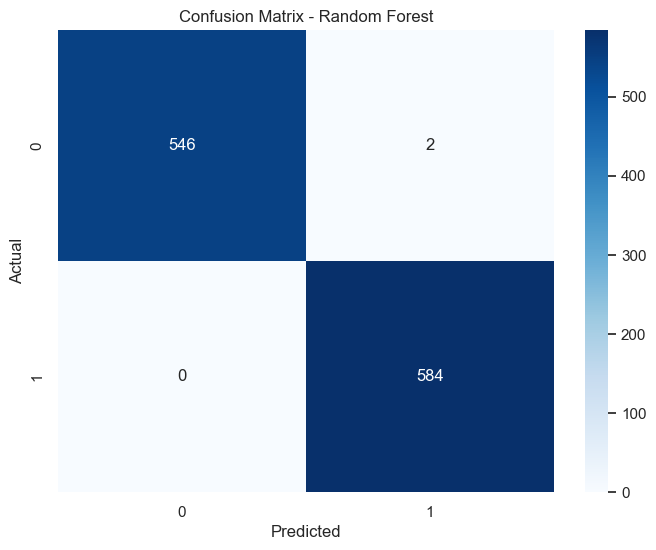

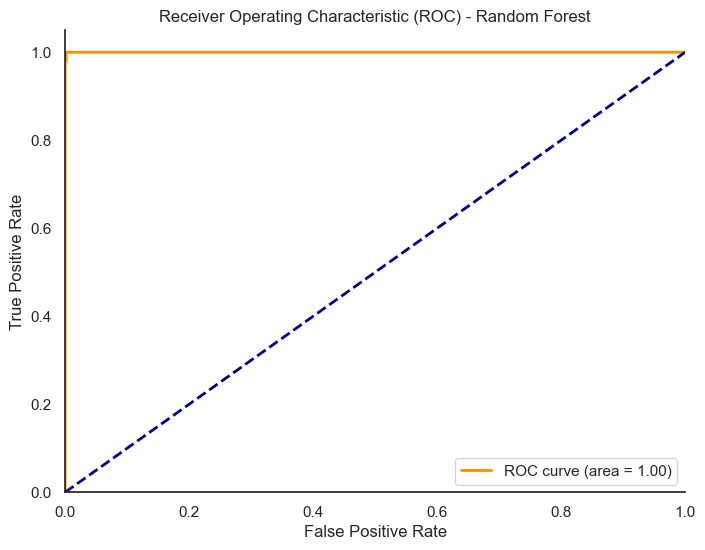

In [ ]:
# Create a Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the Random Forest model using the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC curve and AUC for Random Forest
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

#### Interpretation of Results

##### Classification Report:

The Random Forest model exhibited remarkable performance, achieving an accuracy score of 100% on the test data. Let's break down the key metrics:

- **Precision:** Both classes (0 and 1) achieved a precision score of 100%, indicating that when the model predicted a positive case, it was correct every time.

- **Recall:** The model's recall scores for both classes were 100%, signifying that it correctly identified all actual positive instances for both classes.

- **F1-Score:** The F1-scores for both classes reached the perfect score of 1, which is a harmonious blend of precision and recall.

- **Support:** In the test data, there were 548 instances of class 0 and 584 instances of class 1.

- **Macro avg:** The macro average for precision, recall, and F1-score is 1, demonstrating the exceptional overall performance of the model across both classes.

- **Weighted avg:** The weighted average for precision, recall, and F1-score is also 1, reflecting a balanced and robust model that takes into account the proportion of instances for each class.

##### Confusion Matrix:
- **True negatives (TN): 546** - The model correctly predicted class 0 🚫 for these instances.
- **False positives (FP): 2** - The model incorrectly predicted class 1 ✅ for these instances, which are actually class 0 🚫.
- **False negatives (FN): 0** - The model incorrectly predicted class 0 🚫 for these instances, which are actually class 1 ✅.
- **True positives (TP): 584** - The model correctly predicted class 1 ✅ for these instances.

##### 🔎 Here are some observations:

This report reveal that the model excels at identifying true negatives (TN) in class 0, with an impressive count of 546. However, it displays a relatively small number of false positives (FP), implying that it occasionally predicts class 1 when it's actually class 0. Additionally, there are no false negatives (FN), indicating a conservative approach to predicting class 1. The model's true positives (TP) count, though smaller than TN, suggests it is effective at recognizing class 1 instances.

##### ROC curve and ROC area:
**AUC (Area Under The ROC Curve): 1.00** - This means that the model has a 100% chance of correctly classifying a randomly chosen positive instance as more likely to be positive than a randomly chosen negative one.

An AUC of 1.0 represents a perfect model that makes no mistakes, while an AUC of 0.5 represents a model that performs no better than random chance. Therefore, an AUC of 1.00 is the best possible value.

### Random Forest Feature Importance

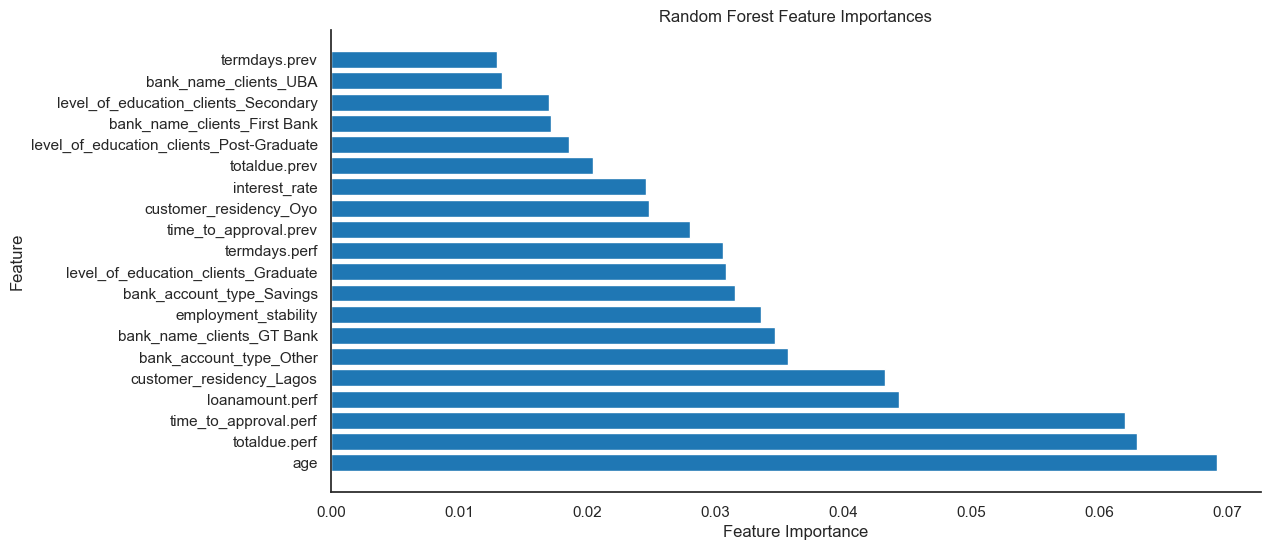

In [ ]:
# Extract feature importances from the trained Random Forest model
feature_importances_rf = random_forest.feature_importances_

# Get the names of the features
feature_names_rf = X_train.columns

# Create a dictionary with feature names as keys and feature importances as values
feature_importance_dict_rf = dict(zip(feature_names_rf, feature_importances_rf))

#Plot feature importances in a bar chart
plt.figure(figsize=(12, 6))
sorted_importance_rf = dict(sorted(feature_importance_dict_rf.items(), key=lambda x: x[1], reverse=True)[:20])  # Display top 20 features
plt.barh(range(len(sorted_importance_rf)), list(sorted_importance_rf.values()), align='center')
plt.yticks(range(len(sorted_importance_rf)), list(sorted_importance_rf.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

The most crucial feature is "age," with an importance score of approximately 0.07. This indicates that a borrower's age plays a significant role in determining the likelihood of loan defaults, with older or younger applicants potentially having a different risk profile. On the other hand, "terms_pay_prev" is the least important feature, with an importance score of around 0.01, implying that the specific terms of payment in the previous period have relatively minimal impact on loan default predictions.

## Random Forest Cross Validation

Cross-validated Accuracy: 0.9935970143792762
Cross-validated Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2282
           1       0.99      1.00      0.99      2246

    accuracy                           0.99      4528
   macro avg       0.99      0.99      0.99      4528
weighted avg       0.99      0.99      0.99      4528



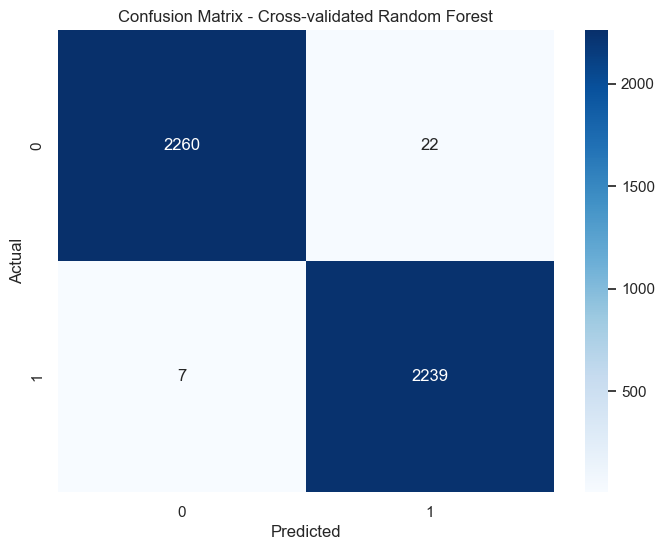

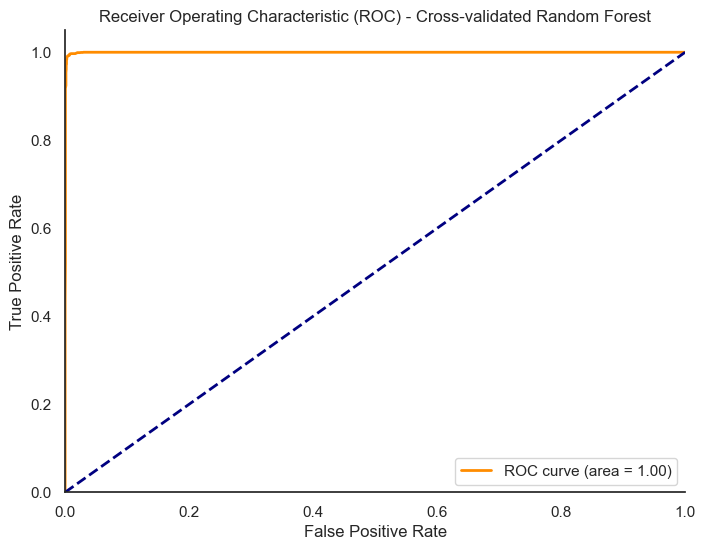

In [ ]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated accuracy
cross_val_accuracy = cross_val_score(random_forest, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validated Accuracy:", cross_val_accuracy.mean())

# Cross-validated predictions
y_pred_cv = cross_val_predict(random_forest, X_train, y_train, cv=cv)

# Print classification report for cross-validated predictions
print("Cross-validated Classification Report:")
print(classification_report(y_train, y_pred_cv))

# Plot confusion matrix for cross-validated predictions
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Cross-validated Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC curve and AUC for cross-validated predictions
y_prob_cv = cross_val_predict(random_forest, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, _ = roc_curve(y_train, y_prob_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Plot ROC curve for cross-validated predictions
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Cross-validated Random Forest')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation Interpretation
##### Classification Report:
* For Class 0: The precision, recall, and F1-score are all around 0.99, which is outstanding. This suggests that when the model predicts Class 0 (e.g., non-defaulted loans), it is correct 99% of the time, and it successfully identifies 99% of actual non-defaulted cases. The F1-score, a measure that balances precision and recall, is also 0.99, indicating a harmonious trade-off.
* For Class 1: Similarly, for Class 1 (e.g., defaulted loans), the precision, recall, and F1-score are around 0.99, indicating a high level of accuracy and effectiveness in predicting defaulted loans.

- **Overall Accuracy:** The overall accuracy of the cross-validated model is 0.99, which is a strong indication of the model's predictive power in classifying the majority of the loan defaults, showcasing its effectiveness in distinguishing between the classes.

- **Macro and Weighted Averages:** The macro and weighted averages for precision, recall, and F1-score are all 0.99. This indicates consistent high performance across both classes, showing that the model is not biased towards any specific class.

#### Confusion matrix:
- **True Positives (TP):** The number of instances where the model correctly predicted loan defaults, which amounts to 2,239. In the context of lending, this means the model accurately identified customers who actually defaulted on their loans.

- **True Negatives (TN):** The number of instances where the model correctly predicted non-defaulted loans, totaling 2,260. This represents cases where the model correctly recognized customers who did not default on their loans.

- **False Positives (FP):** The model predicted loan defaults when there were none, and there were 22 such cases. These are often referred to as Type I errors, where the model wrongly identified customers as defaulting when they didn't.

- **False Negatives (FN):** The model failed to predict loan defaults in 7 cases. These are Type II errors, where the model missed identifying customers who actually defaulted on their loans.

* ROC Curve: An AUC of 1.00 is a highly desirable outcome, as it indicates that the model can accurately identify potential loan defaults without generating false alarms.